---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 16.5 Absolute stability and stiffness
---

In Section 16.2 we were introduced to **stiff** ODEs that required a very small step size $h$ in order for Euler's method to be stable and not blow up.

This is clearly undesirable since having a very small $h$ means that the number of steps $N$ will be very large and the numerical method will take a long time to run.

This instability is due to having a component that rapidly decays, while having its $n^\text{th}$ derivative grow rapidly, such as

$$y(t) = e^{-\lambda t}, \quad \abs{y^{(n)}(t)} = \lambda^n e^{-\lambda t},$$

where $\lambda \gg 1$.

Such behavior is observed in spring-mass systems having a very stiff spring (which is why we call such ODEs stiff).

---

## Example

Consider the stiff ODE

$$y' = -20y + 20\cos(t) - \sin(t), \quad 0 \leq t \leq 2, \quad y(0) = 0,$$

whose solution is

$$y(t) = -e^{-20t} + \cos(t).$$

In [1]:
########################################
function euler(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        K1 = f(tt[i], yy[i])
        yy[i+1] = yy[i] + h*K1
    end
    
    tt, yy
end

########################################
function rktrap(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        K1 = f(tt[i], yy[i])
        K2 = f(tt[i+1], yy[i] + h*K1)
        yy[i+1] = yy[i] + h*(K1 + K2)/2
    end
    
    tt, yy
end

########################################
function rkmidpoint(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        K1 = f(tt[i], yy[i])
        K2 = f(tt[i] + h/2, yy[i] + h/2*K1)
        yy[i+1] = yy[i] + h*K2
    end
    
    tt, yy
end

########################################
function rk4(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        K1 = f(tt[i], yy[i])
        K2 = f(tt[i] + h/2, yy[i] + h/2*K1)
        K3 = f(tt[i] + h/2, yy[i] + h/2*K2)
        K4 = f(tt[i] + h, yy[i] + h*K3)
        yy[i+1] = yy[i] + h*(K1 + 2K2 + 2K3 + K4)/6
    end
    
    tt, yy
end

########################################

rk4 (generic function with 1 method)

In [2]:
f(t, y) = -20y + 20cos(t) - sin(t)
a, b, y0 = 0, 2, 0

ytrue(t) = -exp(-20t) + cos(t)

ytrue (generic function with 1 method)

In [3]:
using Printf

@printf("%6s %12s %12s %12s %12s %12s\n", "N", "h", 
    "euler", "rktrap", "rkmidpoint", "rk4")
for N = 10:25
    h = (b - a)/N
 
    tt1, yy1 = euler(f, a, b, y0, N)
    abserr1 = abs.(yy1 - ytrue.(tt1))
    
    tt2, yy2 = rktrap(f, a, b, y0, N)
    abserr2 = abs.(yy2 - ytrue.(tt2))

    tt3, yy3 = rkmidpoint(f, a, b, y0, N)
    abserr3 = abs.(yy3 - ytrue.(tt3))

    tt4, yy4 = rk4(f, a, b, y0, N)
    abserr4 = abs.(yy4 - ytrue.(tt4))

    @printf("%6d %12.2e %12.2e %12.2e %12.2e %12.2e\n", N, h, 
        maximum(abserr1), maximum(abserr2), 
        maximum(abserr3), maximum(abserr4) )
end

     N            h        euler       rktrap   rkmidpoint          rk4
    10     2.00e-01     5.93e+04     9.86e+06     9.81e+06     9.83e+06
    11     1.82e-01     4.30e+04     3.96e+06     3.94e+06     4.26e+05
    12     1.67e-01     2.62e+04     1.27e+06     1.26e+06     1.25e+04
    13     1.54e-01     1.34e+04     3.32e+05     3.30e+05     2.69e+02
    14     1.43e-01     5.83e+03     7.35e+04     7.31e+04     4.62e+00
    15     1.33e-01     2.13e+03     1.41e+04     1.40e+04     7.69e-01
    16     1.25e-01     6.59e+02     2.40e+03     2.38e+03     5.69e-01
    17     1.18e-01     1.71e+02     3.73e+02     3.70e+02     4.28e-01
    18     1.11e-01     3.71e+01     5.43e+01     5.37e+01     3.27e-01
    19     1.05e-01     6.71e+00     7.59e+00     7.48e+00     2.53e-01
    20     1.00e-01     1.14e+00     1.05e+00     1.03e+00     1.99e-01
    21     9.52e-02     1.06e+00     8.13e-01     8.09e-01     1.58e-01
    22     9.09e-02     9.85e-01     6.77e-01     6.74e-01     1

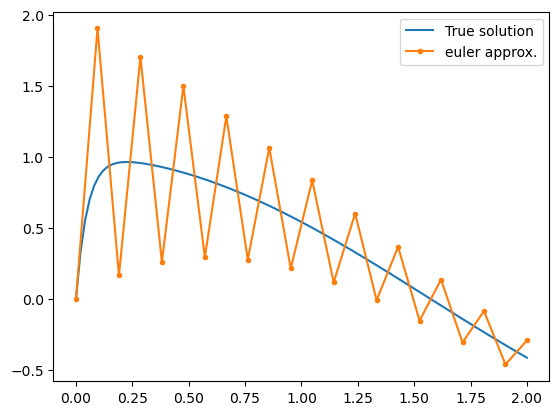

In [15]:
using PyPlot

tt = range(a, b, length=100)
yy = ytrue.(tt)

tt1, yy1 = euler(f, a, b, y0, 21)

plot(tt, ytrue.(tt), label="True solution")
plot(tt1, yy1, ".-", label="euler approx.")
legend(loc="best");

---

## The test equation

The **test equation** is the ODE

$$y' = \lambda y, \quad y(0) = y_0,$$

where $\lambda, y_0 \in \mathbb{C}$ and $y_0 \neq 0$.

The solution of this ODE is

$$y(t) = y_0 e^{\lambda t}.$$

Since 

$$\abs{y(t)} = \abs{y_0} e^{\Re(\lambda)t},$$

we are interested in the case when $\Re(\lambda) < 0$, which is when

$$\lim_{t \to +\infty} \abs{y(t)} = 0.$$

---

## Euler's method

Applying Euler's method to the test equation, we obtain

$$y_{i+1} = y_i + h \lambda y_i = (1 + h\lambda)y_i,$$

which implies that

$$y_k = (1 + h\lambda)^k y_0, \quad k = 0, 1, \ldots, N.$$

Therefore,

$$\lim_{k \to +\infty} \abs{y_k} = 0$$

if and only if

$$\abs{1 + h\lambda} < 1.$$

This implies that we need $h \lambda$ to be strictly within the disk in the complex plane of radius one centered at the point $-1$:

$$D = \set{h\lambda \in \mathbb{C} : \abs{1 + h\lambda} < 1}.$$

We call $D$ the **domain of absolute stability**.

---
From p. 508 of the textbook:

![Regions of stability](regions-of-stability.JPG)

**Figure caption:** Stability regions for $q$-stage explicit RK methods of order $q$, $q = 1,2,3,4$. The inner circle corresponds to forward Euler, $q=1$. The larger $q$ is, the larger the stability region.

---

## Example

Recall the stiff ODE

$$y' = -20y + 20\cos(t) - \sin(t), \quad 0 \leq t \leq 2, \quad y(0) = 0,$$

whose solution is

$$y(t) = -e^{-20t} + \cos(t).$$

Here we have $\lambda = -20$; to have $h\lambda \in D$, we need

$$ -1 < 1 - 20h < 1, $$

which implies that

$$ 0 < 20h < 2. $$

Thus, we need $h < 0.1$ (i.e., $N > 20$) for stability.


---

## Fourth-order Runge-Kutta

Recall that `RK4` is given by

$$ K_1 = f(t_i,y_i) $$

$$ K_2 = f\paren{t_i + \frac{h}{2}, y_i + \frac{h}{2}K_1} $$

$$ K_3 = f\paren{t_i + \frac{h}{2}, y_i + \frac{h}{2}K_2} $$

$$ K_4 = f\paren{t_i + h, y_i + hK_3} $$

$$ y_{i+1} = y_i + \frac{h}{6}\brack{K_1 + 2K_2 + 2K_3 + K_4}$$

If we apply this to the test equation, we will obtain

$$ K_1 = \lambda y_i $$

$$ K_2 = \lambda\paren{y_i + \frac{h}{2}\lambda y_i} 
= \paren{\lambda + \frac{h}{2}\lambda^2} y_i $$

$$ K_3 = \lambda\paren{y_i + \frac{h}{2}\paren{\lambda + \frac{h}{2}\lambda^2} y_i} 
= \paren{\lambda + \frac{h}{2}\lambda^2 + \frac{h^2}{4}\lambda^3 }y_i $$

$$ K_4 = \lambda\paren{y_i + h\paren{\lambda + \frac{h}{2}\lambda^2 + \frac{h^2}{4}\lambda^3 }y_i} = \paren{\lambda + \lambda^2h + \frac{h^2}{2}\lambda^3 + \frac{h^3}{4}\lambda^4 }y_i$$

$$ y_{i+1} = y_i + \frac{h}{6}\brack{\lambda y_i + 2\paren{\lambda + \frac{h}{2}\lambda^2} y_i + 2\paren{\lambda + \frac{h}{2}\lambda^2 + \frac{h^2}{4}\lambda^3 }y_i + \paren{\lambda + \lambda^2h + \frac{h^2}{2}\lambda^3 + \frac{h^3}{4}\lambda^4 }y_i}$$

which simplifies to

$$ y_{i+1} = \paren{1 + h\lambda + \frac{1}{2}(h\lambda)^2  + \frac{1}{6}(h\lambda)^3 + \frac{1}{24}(h\lambda)^4 }y_i.$$

Therefore, the **domain of absolute stability** for `RK4` is 

$$D = \set{h\lambda \in \mathbb{C} : \abs{R(h\lambda)} < 1},$$

where 

$$R(z) = 1 + z + \frac{1}{2}z^2  + \frac{1}{6}z^3 + \frac{1}{24}z^4.$$



---

## Example

Recall the stiff ODE

$$y' = -20y + 20\cos(t) - \sin(t), \quad 0 \leq t \leq 2, \quad y(0) = 0,$$

whose solution is

$$y(t) = -e^{-20t} + \cos(t).$$

Here we have $\lambda = -20$; to have $h\lambda \in D$, we need

$$ -1 < 1 - 20h + 200h^2 - \frac{4000}{3}h^3 + \frac{20000}{3}h^4 < 1. $$


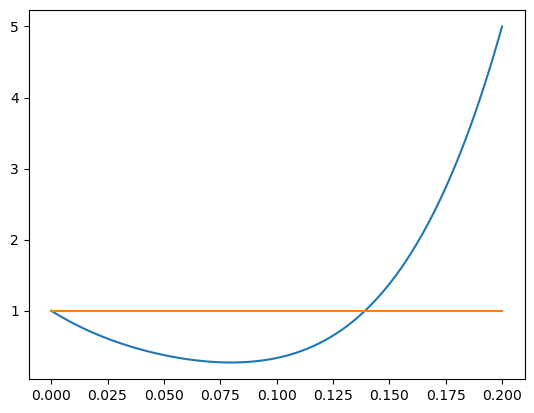

0.13737373737373737

In [16]:
using PyPlot

R(h) = 1 - 20h + 200h^2 - 4000/3*h^3 + 20000/3*h^4

hh = range(0, .2, length=100)
Rh = R.(hh)

plot(hh, Rh)
plot(hh, ones(length(hh)))

maximum(hh[Rh .< 1])

Thus, we need $h < 0.137$ (i.e., $N > 14$) for stability.


In [17]:
(b - a)/0.137

14.5985401459854

---

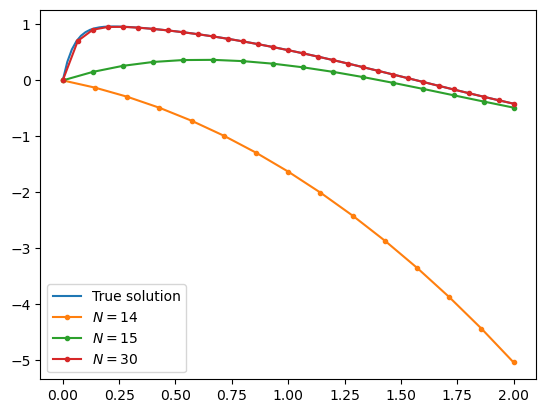

In [18]:
using PyPlot

tt = range(a, b, length=100)
yy = ytrue.(tt)

tt1, yy1 = rk4(f, a, b, y0, 14)
tt2, yy2 = rk4(f, a, b, y0, 15)
tt3, yy3 = rk4(f, a, b, y0, 30)

plot(tt, ytrue.(tt), label="True solution")
plot(tt1, yy1, ".-", label=L"N=14")
plot(tt2, yy2, ".-", label=L"N=15")
plot(tt3, yy3, ".-", label=L"N=30")
legend(loc="best");

---

## Implicit trapezoidal method

Recall that the **implicit trapezoidal method** is given by

$$ y_{i+1} = y_i + \frac{h}{2}\brack{f(t_i,y_i) + f(t_{i+1},y_{i+1})}.$$

Applying this to the test equation, we have

$$ y_{i+1} = y_i + \frac{h}{2}\brack{\lambda y_i + \lambda y_{i+1}},$$

which simplifies to

$$  y_{i+1} = \paren{\frac{2 + h\lambda}{2 - h\lambda}} y_i.$$


Therefore, the **domain of absolute stability** for the implicit trapezoidal method is

$$D = \set{h\lambda \in \mathbb{C} : \abs{R(h\lambda)} < 1},$$

where 

$$R(z) = \frac{2 + z}{2 - z}.$$


It can be shown that if $\Re(z) < 0$, then $\abs{R(z)} < 1$.

Thus, $D$ contains the entire left-half of the complex plane, so it is unconditionally stable.

---

In [19]:
using SymPy

a, b = symbols("a b", real=true)

z = a + IM*b

a + ⅈ⋅b

In [20]:
Rz = (2 + z)/(2 - z)

abs(Rz)^2

 2          2    
a  + 4⋅a + b  + 4
─────────────────
 2          2    
a  - 4⋅a + b  + 4

Suppose that $\Re(z) = a < 0$. Then $4a < -4a$, which implies that $a^2 + 4a + b^2 + 4 < a^2 - 4a + b^2 + 4$. Thus,

$$\abs{R(z)}^2 = \frac{a^2 + 4a + b^2 + 4}{a^2 - 4a + b^2 + 4} < 1,$$

which implies that $\abs{R(z)} < 1$.

---

## Example

Recall the stiff ODE

$$y' = -20y + 20\cos(t) - \sin(t), \quad 0 \leq t \leq 2, \quad y(0) = 0,$$

whose solution is

$$y(t) = -e^{-20t} + \cos(t).$$

The implicit trapezoidal method for this ODE is

$$ y_{i+1} = y_i + \frac{h}{2}\brack{f(t_i,y_i) -20y_{i+1} + 20\cos(t_{i+1}) - \sin(t_{i+1})},$$

which we can rewrite as

$$ y_{i+1} = \frac{1}{1 + 10h}\paren{y_i + \frac{h}{2}\brack{f(t_i,y_i) + 20\cos(t_{i+1}) - \sin(t_{i+1})}}.$$



In [21]:
f(t, y) = -20y + 20cos(t) - sin(t)
a, b, y0 = 0, 2, 0

ytrue(t) = -exp(-20t) + cos(t)

ytrue (generic function with 1 method)

In [24]:
tt = range(a, b, length=10)
yy = zeros(10)

@printf("%6s %12s %14s\n", "N", "h", 
    "implicit trap")
for N = 5:10
    h = (b - a)/N
 
    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    ff = zeros(N+1)
    yy[1] = y0
    
    for i = 1:N
        ff[i] = f(tt[i], yy[i])
        yy[i+1] = (yy[i] + h/2*(ff[i] + 20cos(tt[i+1]) - sin(tt[i+1])))/(1 + 10h)
    end
    abserr = abs.(yy - ytrue.(tt))

    @printf("%6d %12.2e %14.2e\n", N, h, 
        maximum(abserr) )
end

     N            h  implicit trap
     5     4.00e-01       6.01e-01
     6     3.33e-01       5.40e-01
     7     2.86e-01       4.85e-01
     8     2.50e-01       4.35e-01
     9     2.22e-01       3.91e-01
    10     2.00e-01       3.52e-01


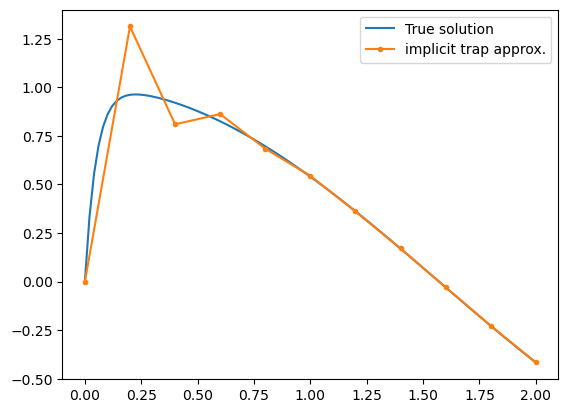

In [25]:
using PyPlot

tt0 = range(a, b, length=100)

plot(tt0, ytrue.(tt0), label="True solution")
plot(tt, yy, ".-", label="implicit trap approx.")
legend(loc="best");

---

## A-stable

A numerical method for solving ODEs is call **A-stable** if its **domain of absolute stability** contains the entire left-half of the complex plane.

Some **A-stable methods** are:

- backward Euler
- implicit trapezoidal
- implicit midpoint

Note that these are all **implicit methods**.

---

## Newton's method for stiff ODEs

Generally, to solve a stiff ODE, one must use an implict method.

However, it is not always possible to obtain a closed-form solution for $y_{i+1}$.

In these cases, we can employ Newton's method to solve the equation for $y_{i+1}$.

Consider the **backward Euler** method:

$$y_{i+1} = y_i + hf(t_{i+1}, y_{i+1}).$$

Let $g(x) = x - y_i - hf(t_{i+1}, x).$ Then $y_{i+1}$ satisfies $g(y_{i+1}) = 0$.

Newton's method is

$$x_{k+1} = x_k - \frac{g(x_k)}{g'(x_k)} = x_k - \frac{x_k - y_i - hf(t_{i+1}, x_k)}{1 - hf_y(t_{i+1}, x_k)}.$$

---

In [27]:
function backEulerNewton(f, fy, a, b, y0, N)
    
    h = (b - a)/N
    tt = range(a, b, length=N+1)
    
    yy = zeros(N+1)
    yy[1] = y0
    
    for i=1:N
        x = yy[i]
        xnew = x
        while true
            xnew = x - (x - yy[i] - h*f(tt[i+1],x))/(1 - h*fy(tt[i+1], x))
            if abs(xnew - x) < 1e-6
                break
            end
            x = xnew
        end
        yy[i+1] = xnew
    end
    
    return tt, yy
end

backEulerNewton (generic function with 1 method)

In [28]:
f(t, y) = -20y + 20cos(t) - sin(t)
fy(t, y) = -20
a, b, y0 = 0, 2, 0

ytrue(t) = -exp(-20t) + cos(t)

ytrue (generic function with 1 method)

In [29]:
@printf("%6s %12s %18s\n", "N", "h", 
    "backEulerNewton")
for N = 5:25
    h = (b - a)/N
 
    tt1, yy1 = backEulerNewton(f, fy, a, b, y0, N)
    abserr1 = abs.(yy1 - ytrue.(tt1))

    @printf("%6d %12.2e %18.2e\n", N, h, 
        maximum(abserr1))
end

     N            h    backEulerNewton
     5     4.00e-01           1.19e-01
     6     3.33e-01           1.36e-01
     7     2.86e-01           1.52e-01
     8     2.50e-01           1.65e-01
     9     2.22e-01           1.76e-01
    10     2.00e-01           1.86e-01
    11     1.82e-01           1.93e-01
    12     1.67e-01           1.98e-01
    13     1.54e-01           2.02e-01
    14     1.43e-01           2.04e-01
    15     1.33e-01           2.06e-01
    16     1.25e-01           2.06e-01
    17     1.18e-01           2.05e-01
    18     1.11e-01           2.04e-01
    19     1.05e-01           2.02e-01
    20     1.00e-01           2.00e-01
    21     9.52e-02           1.97e-01
    22     9.09e-02           1.94e-01
    23     8.70e-02           1.91e-01
    24     8.33e-02           1.87e-01
    25     8.00e-02           1.84e-01


In [30]:
using PyPlot

tt0 = range(a, b, length=100)

plot(tt0, ytrue.(tt0), label="True solution")
plot(tt, yy1, ".-", label="backEulerNewton")
legend(loc="best");

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/krislock/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('x and y must have same first dimension, but have shapes (11,) and (26,)')
  File "/Users/krislock/.julia/conda/3/aarch64/lib/python3.10/site-packages/matplotlib/pyplot.py", line 2812, in plot
    return gca().plot(
  File "/Users/krislock/.julia/conda/3/aarch64/lib/python3.10/site-packages/matplotlib/axes/_axes.py", line 1688, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/krislock/.julia/conda/3/aarch64/lib/python3.10/site-packages/matplotlib/axes/_base.py", line 311, in __call__
    yield from self._plot_args(
  File "/Users/krislock/.julia/conda/3/aarch64/lib/python3.10/site-packages/matplotlib/axes/_base.py", line 504, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "


---

## Exercise

Solve the stiff ODE

$$y' = 5e^{5t}(y - t)^2 + 1, \quad 0 \leq t \leq 1, \quad y(0) = -1,$$

whose solution is

$$y(t) = t - e^{-5t},$$

using the **backward Euler with Newton iteration** with $N = 4$.

Plot the numerical and true solution.



In [31]:
f(t, y) = 5exp(5t)*(y - t)^2 + 1
fy(t, y) = 10exp(5t)*(y - t)
a, b, y0 = 0, 1, -1

ytrue(t) = t - exp(-5t)

ytrue (generic function with 1 method)

In [32]:
@printf("%6s %12s %12s %12s %12s %12s %18s\n", "N", "h", 
    "euler", "rktrap", "rkmidpoint", "rk4", "backEulerNewton")
for N = 2:10
    h = (b - a)/N
 
    tt1, yy1 = euler(f, a, b, y0, N)
    abserr1 = abs.(yy1 - ytrue.(tt1))
    
    tt2, yy2 = rktrap(f, a, b, y0, N)
    abserr2 = abs.(yy2 - ytrue.(tt2))

    tt3, yy3 = rkmidpoint(f, a, b, y0, N)
    abserr3 = abs.(yy3 - ytrue.(tt3))

    tt4, yy4 = rk4(f, a, b, y0, N)
    abserr4 = abs.(yy4 - ytrue.(tt4))
    
    tt5, yy5 = backEulerNewton(f, fy, a, b, y0, N)
    abserr5 = abs.(yy5 - ytrue.(tt5))

    @printf("%6d %12.2e %12.2e %12.2e %12.2e %12.2e %18.2e\n", N, h, 
        maximum(abserr1), maximum(abserr2), 
        maximum(abserr3), maximum(abserr4), maximum(abserr5) )
end

     N            h        euler       rktrap   rkmidpoint          rk4    backEulerNewton
     2     5.00e-01     7.00e+01     2.45e+11     7.70e+02     3.02e+51           8.34e-02
     3     3.33e-01     9.88e+02     5.58e+22     2.22e+13          Inf           9.58e-02
     4     2.50e-01     1.17e+03     2.60e+02     7.02e+05          Inf           9.12e-02
     5     2.00e-01     3.68e-01     1.32e-01     1.89e+25     1.90e-02           8.20e-02
     6     1.67e-01     2.68e-01     1.22e-01     6.37e+17     7.89e-03           7.24e-02
     7     1.43e-01     2.04e-01     9.38e-02     1.63e+05     6.62e-03           6.38e-02
     8     1.25e-01     1.60e-01     7.06e-02     6.86e-02     4.16e-03           5.62e-02
     9     1.11e-01     1.29e-01     5.61e-02     4.87e-02     2.55e-03           5.07e-02
    10     1.00e-01     1.07e-01     4.46e-02     3.65e-02     1.59e-03           4.79e-02


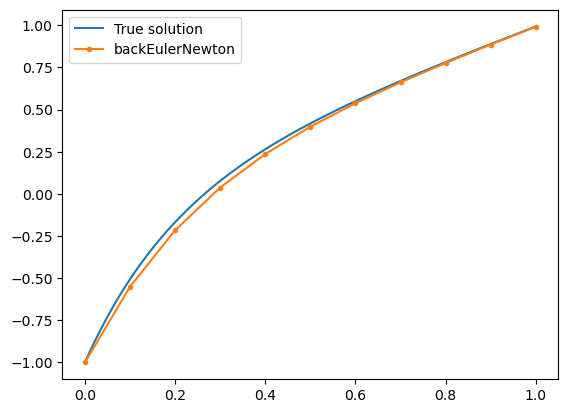

In [33]:
using PyPlot

N = 10

tt0 = range(a, b, length=100)

tt5, yy5 = backEulerNewton(f, fy, a, b, y0, N)

plot(tt0, ytrue.(tt0), label="True solution")
plot(tt5, yy5, ".-", label="backEulerNewton")
legend(loc="best");

---